# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | Flying LHR T5 to CPT Novemb...
1,Not Verified | Worst experience ever. Outbound...
2,✅ Trip Verified | Check in was a shambles at ...
3,✅ Trip Verified | Beyond disgusted with the fa...
4,✅ Trip Verified | On July 19th 2022 I had subm...
5,✅ Trip Verified | I booked the flight on Oct ...
6,✅ Trip Verified | London to Gibraltar on 25th...
7,Not Verified | I’ve generally been a loyal Go...
8,✅ Trip Verified | A great flight. The suites ...
9,✅ Trip Verified | I am happy to say that this...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.shape

(3419, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 0 to 3418
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3419 non-null   object
dtypes: object(1)
memory usage: 26.8+ KB


In [ ]:
df.describe()

,reviews
count,3419
unique,3406
top,LHR to HKG in Club - 777-300ER. Lovely newish ...
freq,2


In [ ]:
df['reviews'] = df['reviews'].str.split('|').str.get(1)

In [ ]:
df.head()

,reviews
0,Flying LHR T5 to CPT November 2022: BA app ...
1,Worst experience ever. Outbound flight was ca...
2,"Check in was a shambles at BWI, just 3 count..."
3,Beyond disgusted with the fact that my baggag...
4,On July 19th 2022 I had submitted a complaint...


In [ ]:
# Calculate word count
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
# Calculate character count
df['char_count'] = df['reviews'].str.len()

In [ ]:
def avg_word(review):
  words = str(review).split()
  return (sum(len(word) for word in words) / len(words))

# Calculate average words
df['avg_word'] = df['reviews'].apply(lambda x: avg_word(x))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Import stopwords
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
df['stopword_coun'] = df['reviews'].apply(lambda x: len([x for x in str(x).split() if x in stop_words]))

In [ ]:
df.describe()

,word_count,char_count,avg_word,stopword_coun
count,3419.000000,1896.000000,3419.000000,3419.000000
mean,94.620357,923.558017,3.863297,38.310032
std,118.574470,604.770788,0.806920,50.455599
min,1.000000,100.000000,3.000000,0.000000
25%,1.000000,491.000000,3.000000,0.000000
50%,60.000000,776.500000,4.196172,22.000000
75%,153.000000,1166.000000,4.566859,60.500000
max,656.000000,3518.000000,6.000000,323.000000


In [ ]:
df.head()

,reviews,word_count,char_count,avg_word,stopword_coun
0,Flying LHR T5 to CPT November 2022: BA app ...,263,1384.0,4.365759,98
1,Worst experience ever. Outbound flight was ca...,53,290.0,4.576923,18
2,"Check in was a shambles at BWI, just 3 count...",180,934.0,4.241573,86
3,Beyond disgusted with the fact that my baggag...,75,416.0,4.621622,33
4,On July 19th 2022 I had submitted a complaint...,96,536.0,4.642105,38


In [ ]:
# Lower case all words
df['review_lower'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [ ]:
# Remove Punctuation
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Import stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stopwords
df['review_nopunc_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))

In [ ]:
# Return frequency of values
freq= pd.Series(" ".join(df['review_nopunc_nostop']).split()).value_counts()[:30]

In [ ]:
print(freq)

flight        3588
ba            2450
service       1523
nan           1523
london        1502
seat          1175
food          1171
british       1092
airways       1091
crew          1065
time          1048
class          987
cabin          986
seats          956
good           914
one            879
heathrow       873
business       848
would          833
staff          832
economy        733
get            732
airline        642
first          622
us             610
flights        588
hours          581
back           564
even           547
passengers     546
dtype: int64


In [ ]:
other_stopwords = ['ba', 'nan', 'would', 'get', 'us', 'even']

In [ ]:
df['review_nopunc_nostop_nocommon'] = df['review_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in str(x).split() if x not in other_stopwords)))

In [ ]:
df.head()

,reviews,word_count,char_count,avg_word,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop,review_nopunc_nostop_nocommon
0,Flying LHR T5 to CPT November 2022: BA app ...,263,1384.0,4.365759,98,flying lhr t5 to cpt november 2022: ba app and...,flying lhr t5 to cpt november 2022 ba app and ...,flying lhr t5 cpt november 2022 ba app website...,flying lhr t5 cpt november 2022 app website wo...
1,Worst experience ever. Outbound flight was ca...,53,290.0,4.576923,18,worst experience ever. outbound flight was can...,worst experience ever outbound flight was canc...,worst experience ever outbound flight cancelle...,worst experience ever outbound flight cancelle...
2,"Check in was a shambles at BWI, just 3 count...",180,934.0,4.241573,86,"check in was a shambles at bwi, just 3 counter...",check in was a shambles at bwi just 3 counters...,check shambles bwi 3 counters open full flight...,check shambles bwi 3 counters open full flight...
3,Beyond disgusted with the fact that my baggag...,75,416.0,4.621622,33,beyond disgusted with the fact that my baggage...,beyond disgusted with the fact that my baggage...,beyond disgusted fact baggage yet delivered 5 ...,beyond disgusted fact baggage yet delivered 5 ...
4,On July 19th 2022 I had submitted a complaint...,96,536.0,4.642105,38,on july 19th 2022 i had submitted a complaint ...,on july 19th 2022 i had submitted a complaint ...,july 19th 2022 submitted complaint form regard...,july 19th 2022 submitted complaint form regard...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Import textblob
from textblob import Word

# Lemmatize final review format
df['cleaned_review'] = df['review_nopunc_nostop_nocommon']\
.apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

In [ ]:
print('Base Review \n', df['reviews'][0])
print('\n ============================= \n')
print('Cleaned and Lemmatized Review \n', df['cleaned_review'][0])

Base Review 
   Flying LHR T5 to CPT November 2022:  BA app and website not working properly - would not load my ticket. LHR T5 smooth and calm. Checking process quick. - But boarding card would not scan at security, they gave me one for someone else to a different destination.  Ran back to checkin to get correct one. Bags also tagged incorrectly and had disappeared.  Someone ran off to find my bags in the depths of T5 and retag them (amazingly they did show up in Cape Town).  Told only main lounge was open not B and C pier lounges. Turns out this was false information ... B Pier lounge was open. But I was in main lounge which was overcrowded and worn out. -Arrived late to the gate (train not working). There was a Biz class lane (quick) but then a giant queue to get on the plane as they only had one airbridge, not two. Seat comfy and cabin clean but the sinks were taped up as the waste was not working. I was offered hand sanitiser instead but this is disgusting (imagine going to the ba

In [ ]:
# Calculate polarity
from textblob import TextBlob
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
df[['reviews', 'polarity']]

,reviews,polarity
0,Flying LHR T5 to CPT November 2022: BA app ...,0.025595
1,Worst experience ever. Outbound flight was ca...,-0.400000
2,"Check in was a shambles at BWI, just 3 count...",0.007895
3,Beyond disgusted with the fact that my baggag...,0.000000
4,On July 19th 2022 I had submitted a complaint...,-0.125000
...,...,...
3414,NaN,0.000000
3415,NaN,0.000000
3416,NaN,0.000000
3417,NaN,0.000000


In [ ]:
# Calculate subjectivity
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
df[['reviews', 'subjectivity']]

,reviews,subjectivity
0,Flying LHR T5 to CPT November 2022: BA app ...,0.513393
1,Worst experience ever. Outbound flight was ca...,0.720000
2,"Check in was a shambles at BWI, just 3 count...",0.586505
3,Beyond disgusted with the fact that my baggag...,0.356250
4,On July 19th 2022 I had submitted a complaint...,0.100000
...,...,...
3414,NaN,0.000000
3415,NaN,0.000000
3416,NaN,0.000000
3417,NaN,0.000000


In [ ]:
new_df = df.dropna()

In [ ]:
new_df.head()

,reviews,word_count,char_count,avg_word,stopword_coun,review_lower,review_nopunc,review_nopunc_nostop,review_nopunc_nostop_nocommon,cleaned_review,polarity,subjectivity
0,Flying LHR T5 to CPT November 2022: BA app ...,263,1384.0,4.365759,98,flying lhr t5 to cpt november 2022: ba app and...,flying lhr t5 to cpt november 2022 ba app and ...,flying lhr t5 cpt november 2022 ba app website...,flying lhr t5 cpt november 2022 app website wo...,flying lhr t5 cpt november 2022 app website wo...,0.025595,0.513393
1,Worst experience ever. Outbound flight was ca...,53,290.0,4.576923,18,worst experience ever. outbound flight was can...,worst experience ever outbound flight was canc...,worst experience ever outbound flight cancelle...,worst experience ever outbound flight cancelle...,worst experience ever outbound flight cancelle...,-0.400000,0.720000
2,"Check in was a shambles at BWI, just 3 count...",180,934.0,4.241573,86,"check in was a shambles at bwi, just 3 counter...",check in was a shambles at bwi just 3 counters...,check shambles bwi 3 counters open full flight...,check shambles bwi 3 counters open full flight...,check shamble bwi 3 counter open full flight b...,0.007895,0.586505
3,Beyond disgusted with the fact that my baggag...,75,416.0,4.621622,33,beyond disgusted with the fact that my baggage...,beyond disgusted with the fact that my baggage...,beyond disgusted fact baggage yet delivered 5 ...,beyond disgusted fact baggage yet delivered 5 ...,beyond disgusted fact baggage yet delivered 5 ...,0.000000,0.356250
4,On July 19th 2022 I had submitted a complaint...,96,536.0,4.642105,38,on july 19th 2022 i had submitted a complaint ...,on july 19th 2022 i had submitted a complaint ...,july 19th 2022 submitted complaint form regard...,july 19th 2022 submitted complaint form regard...,july 19th 2022 submitted complaint form regard...,-0.125000,0.100000


Text(0, 0.5, '')

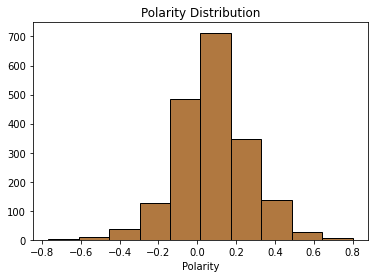

In [ ]:
sns.histplot(new_df, x='polarity', color="#964B00", bins=10)
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("")

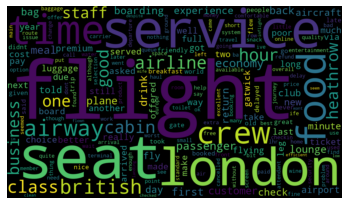

In [ ]:
# Plotting the word cloud

allWords = ' '.join(review for review in new_df['cleaned_review'])
word_cloud = WordCloud(collocations = False, width = 1400, height = 800, background_color = 'black').generate(allWords)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

new_df['Analysis'] = new_df['polarity'].apply(getAnalysis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
new_df.shape

(1896, 13)

In [ ]:
new_df.reset_index(drop=True, inplace=True)

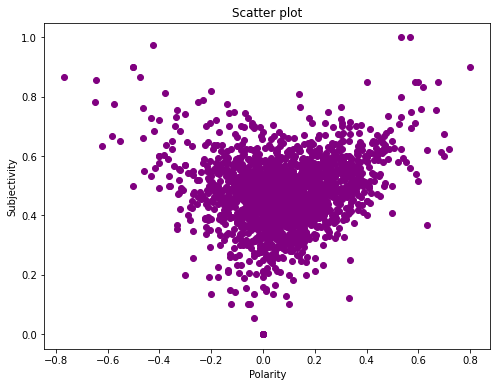

In [ ]:
# plotting the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, new_df.shape[0]):
  plt.scatter(new_df['polarity'][i], new_df['subjectivity'][i], color='Purple')

plt.title('Scatter plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

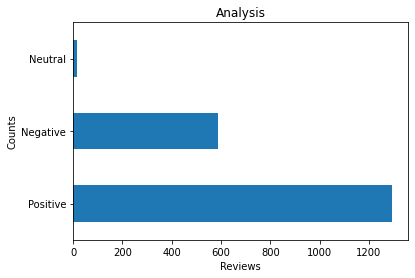

In [ ]:
new_df['Analysis'].value_counts()

plt.title("Analysis")
plt.xlabel("Reviews")
plt.ylabel("Counts")
new_df['Analysis'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
new_df.to_csv("Final_reviews.csv")